In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [2]:
#General parameters
years = 5
time = 261 * years
initial_capital = 1000


#Import parameters
n=1000
path="data/MSCI_World.csv"
limit = slice(n, time+n)


#Swing tade parameters
trades = 12 * years
max_trades = 20 * years
hold_time = 20
time_after_reversel = 0
smooth_period = 5

trade_coast = 1
spread = 0.002


chim =  ChartImport(  initial_capital=initial_capital, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread)

performance, dates = chim.load_data(path=path, limit=limit)

random_swing_performance_analyse, trade_dates_random  = chim.random_swing_trade_ana(set='data')
swing_performance_analyse, trade_dates = chim.swing_trade_ana(set='data')

chim.print_parameters()
chim.print_results()


Data parameters: 

path:  data/MSCI_World.csv


Swing trade parameters: 

Max trades:  100
Trades:  60
Hold time:  20
Time after reversel:  0
Trade coast:  1
Spread:  0.002


Buy and hold return:  2374.1139734349404
Random swing trade return analyse:  1204.550839024921
Swing trade return analyse:  2076.62956314239


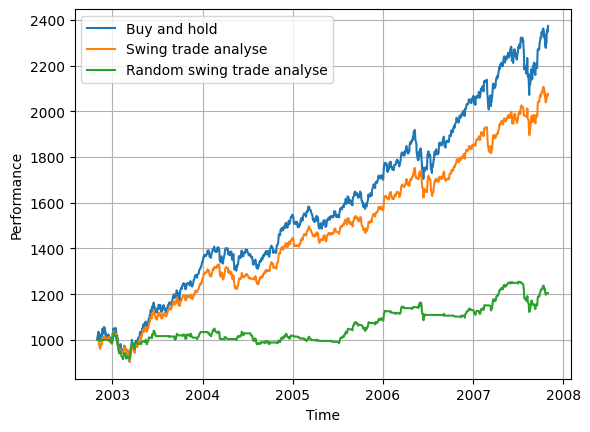

In [3]:
plt.plot(dates, performance, label="Buy and hold")
plt.plot(dates, swing_performance_analyse, label="Swing trade analyse")
plt.plot(dates, random_swing_performance_analyse, label="Random swing trade analyse")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

#plt.yscale("log")

plt.show()

In [8]:
mc = MonteCarloSimulation(chartimp=chim)
_ = mc.mc_import_chart(n=100, stepsize=1, path=path, limit=limit)

ValueError: Stepsize times n times time is larger than the length of the data: 1, n: 100, time: 1305, data length: 6832

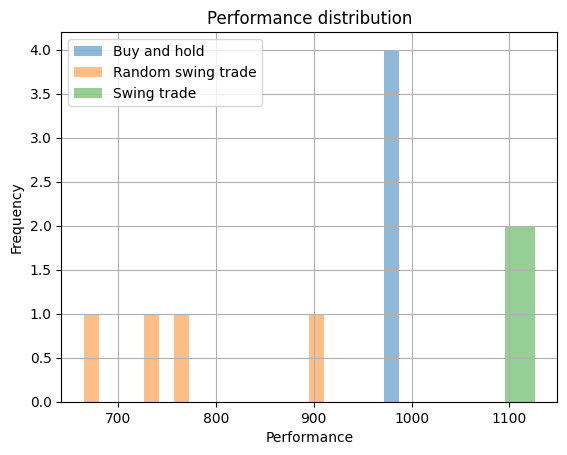

Parameters of ChartImport: 

Data parameters: 

path:  data/MSCI_World.csv


Swing trade parameters: 

Max trades:  100
Trades:  60
Hold time:  20
Time after reversel:  0
Trade coast:  1
Spread:  0.002




Buy and hold return: 977.363 +/- 3.463 (Median: 978.117)
Random swing trade return: 767.582 +/- 88.974 (Median: 748.096)
Swing trade return: 1112.002 +/- 9.63 (Median: 1110.524)


In [7]:
mc.hist_performance(bins=30)
mc.print_results(accuracy=3)

In [ ]:
mc.chartsim